# Static Plots

- [pandas.DataFrame.plot — pandas 1.4.1 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [Matplotlib — Visualization with Python](https://matplotlib.org/)


## 対象者

- pandas DataFrame / Series は使ったことがある方
- plot を使って、静的な描画を簡単に行いたい方
- そこそこのデータ量を扱いたい方


## 目次
- `.plot()` メソッドのオプションを使う
- matplotlib を組み合わせて描画する
- 価格帯別出来高とMarket Depth を 描画する


## データ
- cryptochasis の約定データを使ってOHLCVデータを作成
- [crypto-chassis/cryptochassis-data-api-docs: A REST API providing snapshot, tick, and aggregated market data for crypto-currencies](https://github.com/crypto-chassis/cryptochassis-data-api-docs#trade)
- スクリプトは [botter4visualization/data.py](https://github.com/fin-py/botter4visualization/blob/main/source/data.py) に記載しています


In [1]:
# warning 非表示
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.__version__

'1.4.2'

### データ作成方法
- [botter4visualization/data.py](https://github.com/fin-py/botter4visualization/blob/main/source/data.py) をお使いください
- cryptochasisが対応している取引所などは[こちら](https://github.com/crypto-chassis/cryptochassis-data-api-docs#general-api-information)で確認してください
- install するライブラリなどは、[requirements.txt](https://github.com/fin-py/botter4visualization/blob/main/requirements.txt)で確認してください
- 今回使ったデータと同じデータを作成するには
    ```bash
    $ python data.py download-execution-files
    $ python data.py gz-to-pickle
    ```
- オプションを確認するには
    ```bash
    $ python data.py --help
    ``` 


### データ読み込み

- 約定データを読み込み、５分足のOHLCVに変換します

In [2]:
df_btc_eur =pd.read_pickle("../data/binance_btc-eur.pkl")
df_btc_eur.head()


,time_seconds,price,size,is_buyer_maker,instrument
datetime,,,,,
2022-03-19 00:00:00.872000+00:00,1.647648e+09,37859.61,0.00050,0,btc-eur
2022-03-19 00:00:27.573999872+00:00,1.647648e+09,37878.52,0.00060,1,btc-eur
2022-03-19 00:00:27.941999872+00:00,1.647648e+09,37878.71,0.00045,1,btc-eur
2022-03-19 00:00:37.752000+00:00,1.647648e+09,37878.43,0.03969,1,btc-eur
2022-03-19 00:00:47.352000+00:00,1.647648e+09,37892.74,0.00263,0,btc-eur


In [3]:
df_btc_eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1525681 entries, 2022-03-19 00:00:00.872000+00:00 to 2022-03-21 23:59:59.045000192+00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   time_seconds    1525681 non-null  float64
 1   price           1525681 non-null  float64
 2   size            1525681 non-null  float64
 3   is_buyer_maker  1525681 non-null  int64  
 4   instrument      1525681 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 69.8+ MB


In [4]:
# 5分のOHLCVに変換
# 参照: Botterのためのpandas入門 https://botter4pandas.readthedocs.io/ja/latest/resample.html

rule = "5min"
df_ohlc_btc_eur = df_btc_eur["price"].resample(rule, label="right").ohlc()
df_ohlc_btc_eur["volume"] = df_btc_eur["size"].resample(rule, label="right").sum()
df_ohlc_btc_eur.head()

,open,high,low,close,volume
datetime,,,,,
2022-03-01 00:05:00+00:00,38500.00,38819.43,38500.00,38735.89,21.38764
2022-03-01 00:10:00+00:00,38736.62,38780.34,38565.49,38750.73,7.26478
2022-03-01 00:15:00+00:00,38755.32,38911.58,38702.27,38709.50,8.15811
2022-03-01 00:20:00+00:00,38717.66,38717.66,38532.55,38609.43,4.03998
2022-03-01 00:25:00+00:00,38613.28,38669.74,38564.50,38625.18,2.87284


### plot メソッド

`plot()` はデフォルトで折れ線グラフを描画


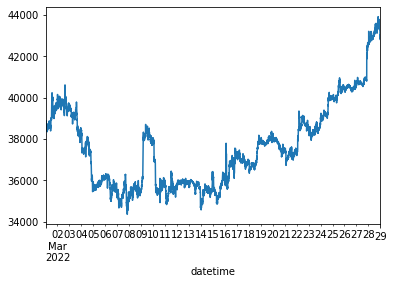

In [5]:
# close を折れ線でグラフで描画
df_ohlc_btc_eur["close"].plot();

### 基本的な描画オプション

罫線や描画サイズなど、オプションで変更できます。

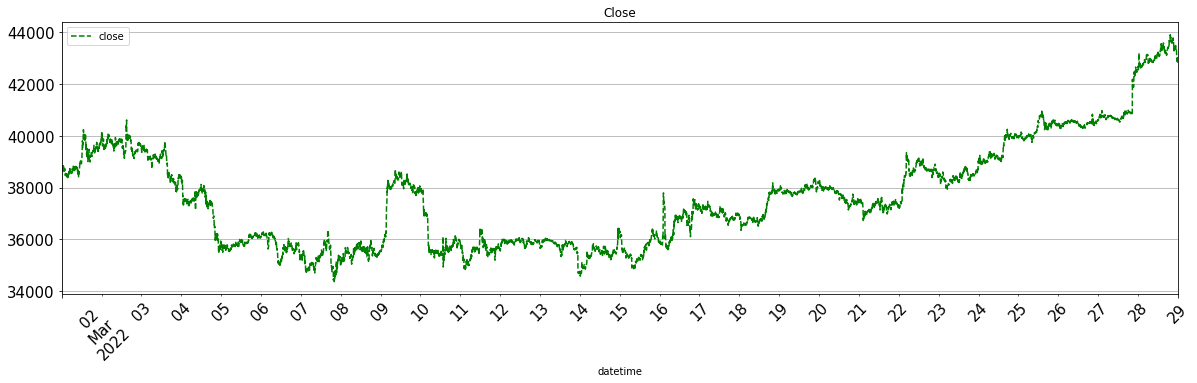

In [6]:
df_ohlc_btc_eur["close"].plot(
    grid=True, # 罫線
    figsize=(20,5),  # 描画サイズ。インチ（横、縦）
    title="Close",  # グラフタイトル
    legend=True,  # 凡例
    rot=45,  # xtick の ローテーション
    fontsize=15, # 文字サイズ
    style={"close": "g--"}, # 色と線の種類,
    );

### サブプロット

同じ DataFrame にあるデータであれば、 `subplots=True` オプションでサブプロットできます

In [7]:
import ta

df_ohlc_btc_eur["RSI14"] = ta.momentum.rsi(df_ohlc_btc_eur["close"], window=14)

In [8]:
df_ohlc_btc_eur.tail()

,open,high,low,close,volume,RSI14
datetime,,,,,,
2022-03-28 23:40:00+00:00,43026.45,43044.51,42969.20,43038.99,2.88405,34.685962
2022-03-28 23:45:00+00:00,43052.70,43072.27,43021.37,43034.21,1.07998,34.485364
2022-03-28 23:50:00+00:00,43027.09,43027.09,42930.60,42948.57,1.42620,31.023581
2022-03-28 23:55:00+00:00,42948.57,42953.04,42656.89,42794.68,19.00424,25.977242
2022-03-29 00:00:00+00:00,42787.28,42943.00,42766.83,42893.96,5.58367,33.493235


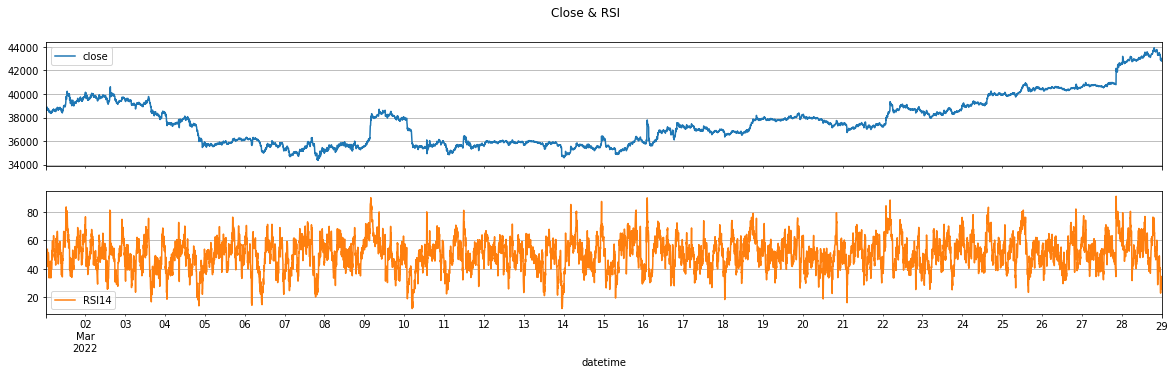

In [9]:
df_ohlc_btc_eur[["close", "RSI14"]].plot(
    grid=True,
    figsize=(20, 5),
    title="Close & RSI",
    legend=True,
    subplots=True,
    layout=(2, 1),  # レイアウト（行,列）
);

### 第二軸

`secondary_y=` オプションで、右側にｙの第二軸を取ることができます

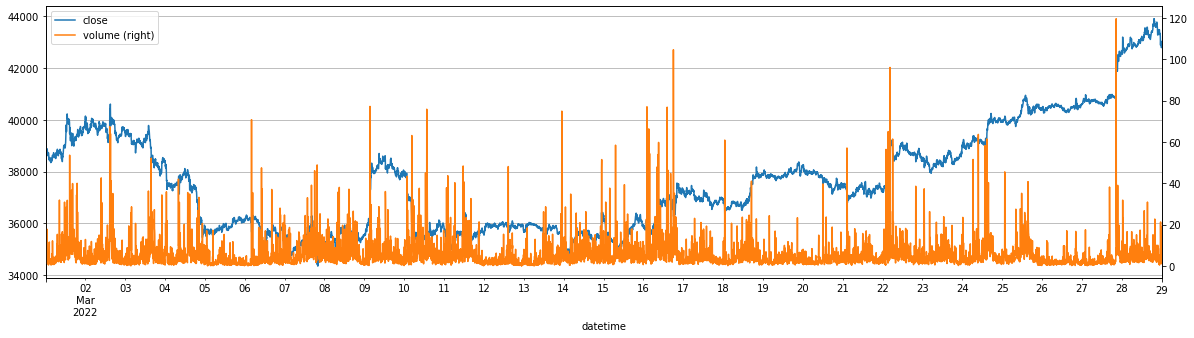

In [10]:
df_ohlc_btc_eur[["close", "volume"]].plot(
    grid=True,
    figsize=(20, 5),
    secondary_y="volume",
);

### bar について

- bar は描画に時間がかかります。
- 代わりに `area` を使うのが1つの方法かと思います。

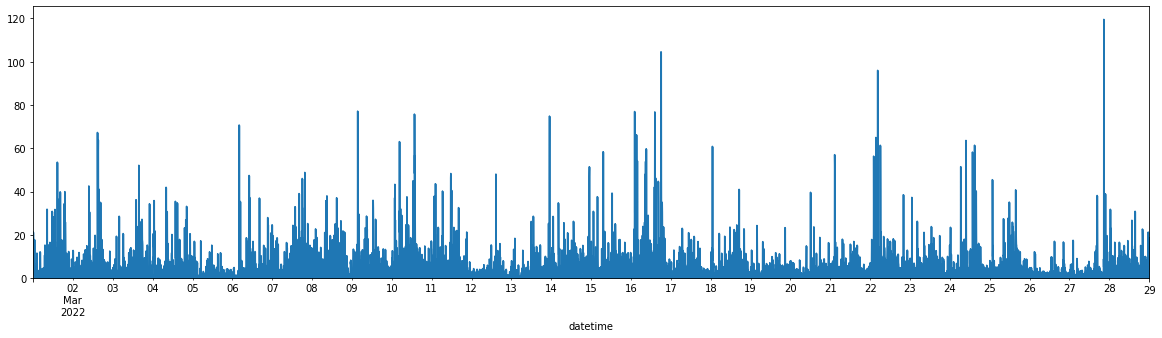

In [11]:
# df_ohlc_btc_eur["volume"].head(100).plot(kind="bar", use_index = False, figsize=(20,5) );
df_ohlc_btc_eur["volume"].plot(kind="area", figsize=(20, 5));

### 日本語豆腐問題

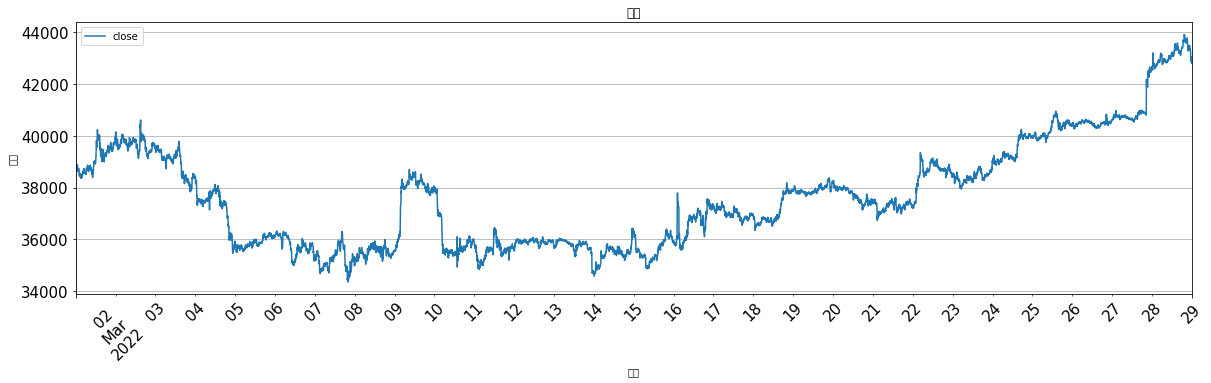

In [12]:
df_ohlc_btc_eur["close"].plot(
    grid=True,
    figsize=(20, 5),
    title="終値",
    legend=True,
    rot=45,
    fontsize=15,
    xlabel="時間",
    ylabel="価格",
);

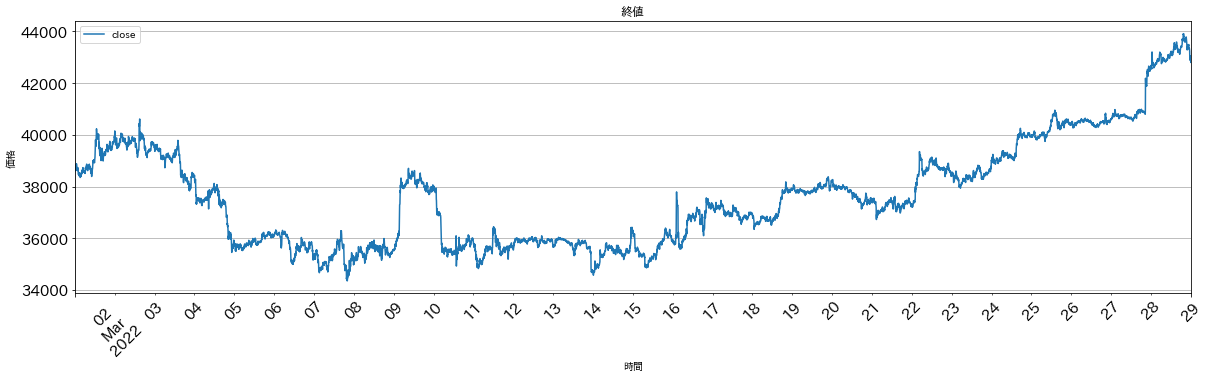

In [13]:
import japanize_matplotlib

df_ohlc_btc_eur["close"].plot(
    grid=True,
    figsize=(20, 5),
    title="終値",
    legend=True,
    rot=45,
    fontsize=15,
    xlabel="時間",
    ylabel="価格",
);

## matplotlib と組み合わせて描画する
- `.plot()` だけでは表現できない時は `matplotloib` を使います
- 例：価格変化を曜日ごとにサブプロットで描画したい


### matplotlib でサブプロットする手順

1. matplotlib で サブプロット作成
    - `add_subplot`
    - `subplots` 
1. `.plot()` の `ax=` オプションに axes オブジェクトを渡す

### add_subplot

```python
import matplotlib.pyplot as plt 
fig = plt.figure()
fig.add_subplot(総行数,総列数,サブプロット番号)
```

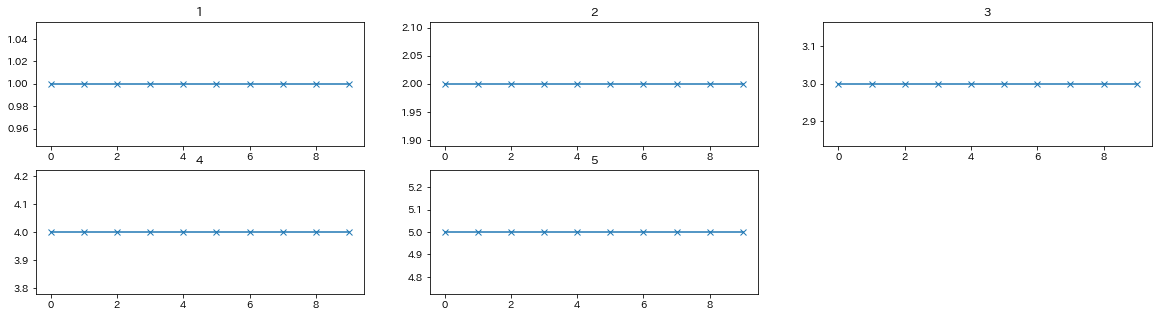

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))

for i in range(1, 6):
    ax = fig.add_subplot(2, 3, i)  # ２行, ３列, i番
    pd.Series([i] * 10).plot(ax=ax, title=i, marker="x")

### subplots

```python
import matplotlib.pyplot as plt
fig, axes = plt.subplots(総行数, 総列数)
```

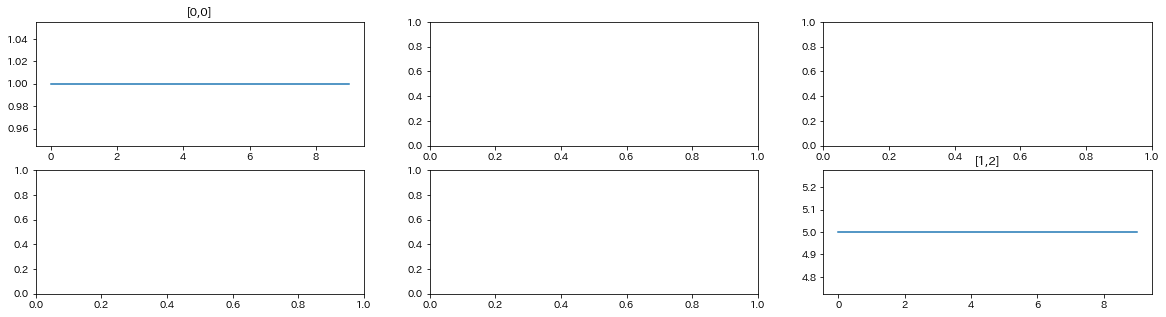

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 5))

pd.Series([1]*10).plot(ax=axes[0,0], title="[0,0]")
pd.Series([5]*10).plot(ax=axes[1,2], title="[1,2]");

### 曜日ごとに分けてヒストグラムを描画
- `df.plot(subplots=True)` は複数データが全く同じIndexを持つ場合は使用出来ますが、groupby などで分割したデータには使用出来ません。
- その場合は `matolotlib` の `subplots` などを使う必要があります


In [16]:
# 曜日を追加 (dayofweek (Monday=0, Sunday=6) でも可)
df_ohlc_btc_eur["day_name"] = df_ohlc_btc_eur.index.day_name()  

# ５分毎の価格変化を追加
df_ohlc_btc_eur["price_change"] = df_ohlc_btc_eur["close"].pct_change()
df_ohlc_btc_eur.tail()

,open,high,low,close,volume,RSI14,day_name,price_change
datetime,,,,,,,,
2022-03-28 23:40:00+00:00,43026.45,43044.51,42969.20,43038.99,2.88405,34.685962,Monday,-0.000097
2022-03-28 23:45:00+00:00,43052.70,43072.27,43021.37,43034.21,1.07998,34.485364,Monday,-0.000111
2022-03-28 23:50:00+00:00,43027.09,43027.09,42930.60,42948.57,1.42620,31.023581,Monday,-0.001990
2022-03-28 23:55:00+00:00,42948.57,42953.04,42656.89,42794.68,19.00424,25.977242,Monday,-0.003583
2022-03-29 00:00:00+00:00,42787.28,42943.00,42766.83,42893.96,5.58367,33.493235,Tuesday,0.002320


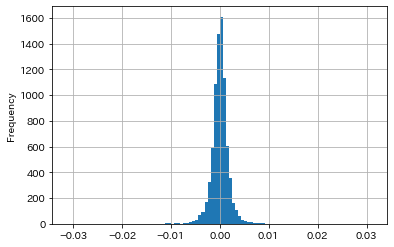

In [17]:
df_ohlc_btc_eur["price_change"].plot(kind="hist", bins=100, grid=True);

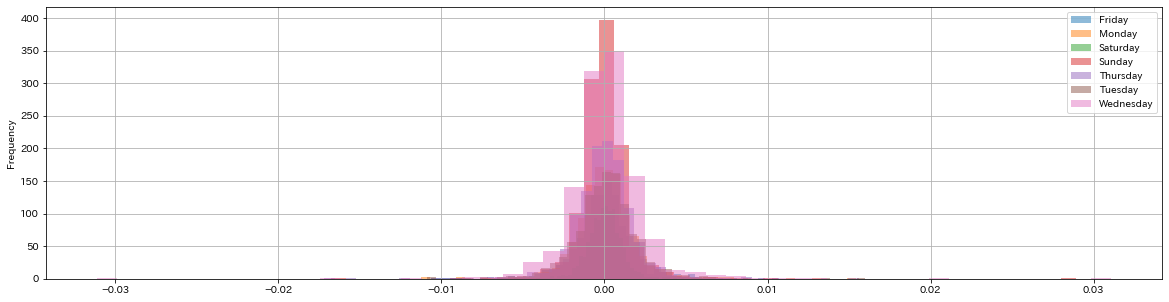

In [18]:
# 参照: Botterのためのpandas入門 https://botter4pandas.readthedocs.io/ja/latest/resample.html

df_ohlc_btc_eur.groupby("day_name")["price_change"].plot(
    kind="hist",
    bins=50,
    grid=True,
    legend=True,
    figsize=(20, 5),
    alpha=0.5,
);

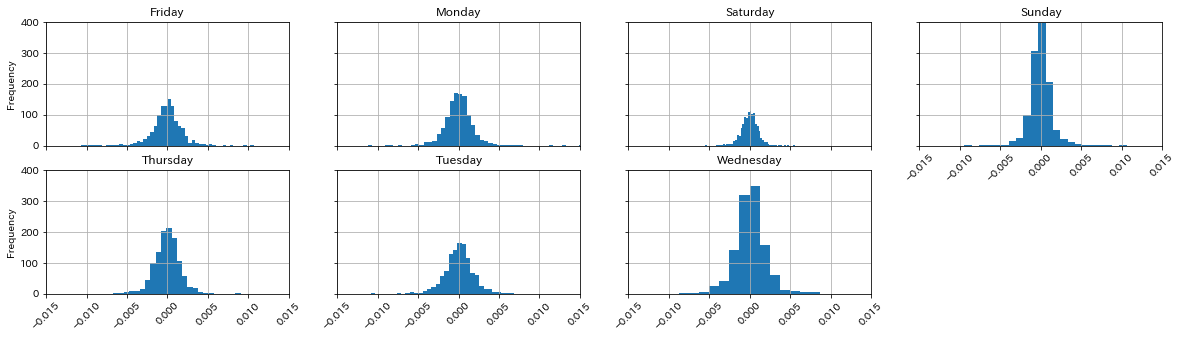

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))

i = 1
for name, s in list(df_ohlc_btc_eur.groupby("day_name")["price_change"]):
    ax = fig.add_subplot(2, 4, i)
    s.plot(
        kind="hist",
        ax=ax,
        title=name,
        xlim=(-0.015, 0.015),
        ylim=(0, 400),
        sharex=True,
        sharey=True,
        grid=True,
        bins=50,
        rot=45,
    )
    i += 1

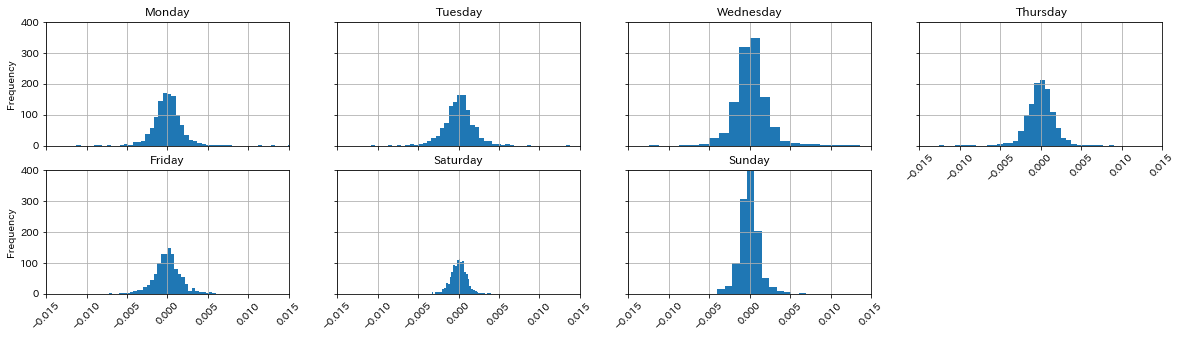

In [20]:
daynames = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))

i = 1
grp = df_ohlc_btc_eur.groupby("day_name")["price_change"]
for name in daynames:
    s = grp.get_group(name)
    ax = fig.add_subplot(2, 4, i)
    s.plot(
        kind="hist",
        ax=ax,
        title=name,
        xlim=(-0.015, 0.015),
        ylim=(0, 400),
        sharex=True,
        sharey=True,
        grid=True,
        bins=50,
        rot=45,
    )
    i += 1

### 価格帯別出来高
- 頂いたアンケートで、価格帯別出来高と market depth の描画についてのご質問が多かったので、この2つを .plot と matplotlib で描画する方法を紹介
- ただ、ここで紹介する方法よりも、plotly を使ったほうが楽です。

In [21]:
# 15分OHLCVを作成
df_15min = df_btc_eur["price"].resample("15min", label="right").ohlc()
df_15min["volume"] = df_btc_eur["size"].resample("15min", label="right").sum()

# pandas.cut https://pandas.pydata.org/docs/reference/api/pandas.cut.html
df_15min["pricecut"] = pd.cut(
    df_15min["close"],
    30,
).apply(lambda x: x.left)
s_vol_by_price = df_15min.groupby("pricecut")["volume"].sum()

In [22]:
pd.cut(df_15min["close"],30,).head()

datetime
2022-03-01 00:15:00+00:00    (38506.104, 38821.835]
2022-03-01 00:30:00+00:00    (38506.104, 38821.835]
2022-03-01 00:45:00+00:00    (38821.835, 39137.565]
2022-03-01 01:00:00+00:00    (38821.835, 39137.565]
2022-03-01 01:15:00+00:00    (38506.104, 38821.835]
Freq: 15T, Name: close, dtype: category
Categories (30, interval[float64, right]): [(34392.138, 34717.34] < (34717.34, 35033.071] < (35033.071, 35348.801] < (35348.801, 35664.531] ... (42610.599, 42926.329] < (42926.329, 43242.059] < (43242.059, 43557.79] < (43557.79, 43873.52]]

In [23]:
df_15min.head()

,open,high,low,close,volume,pricecut
datetime,,,,,,
2022-03-01 00:15:00+00:00,38500.00,38911.58,38500.00,38709.50,36.81053,38506.104
2022-03-01 00:30:00+00:00,38717.66,38737.22,38532.55,38699.72,8.61861,38506.104
2022-03-01 00:45:00+00:00,38708.79,38855.14,38660.00,38832.02,12.49577,38821.835
2022-03-01 01:00:00+00:00,38841.55,39014.56,38687.39,38882.82,22.28080,38821.835
2022-03-01 01:15:00+00:00,38883.49,38932.19,38616.54,38635.33,9.86671,38506.104


In [24]:
s_vol_by_price.head()

pricecut
34392.138     435.63711
34717.34     1412.83708
35033.071    2183.13348
35348.801    5886.14376
35664.531    4763.29875
Name: volume, dtype: float64

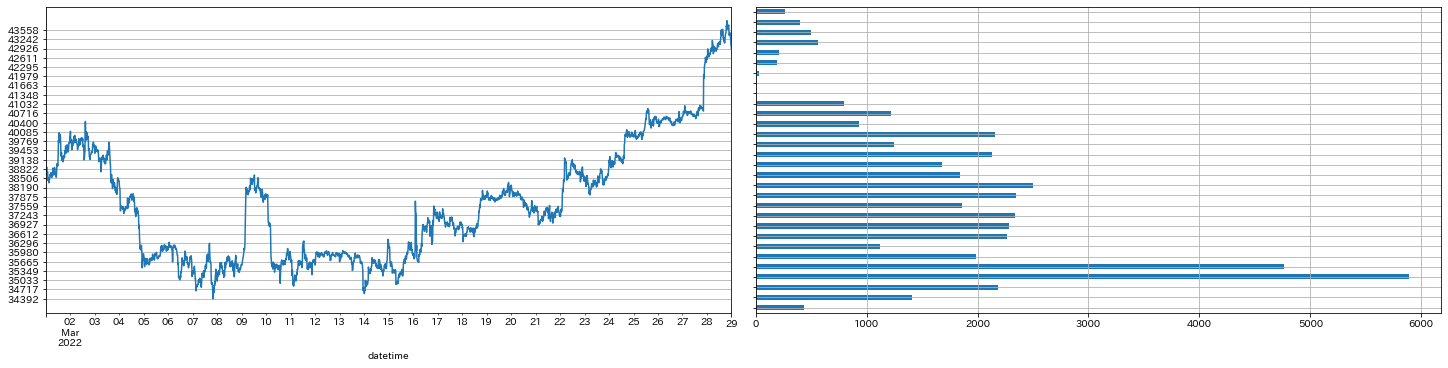

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    1, 2, figsize=(20, 5), constrained_layout=True
)  # constrained_layout: サブプロット同士をいい感じで描画

df_15min["close"].plot(ax=axes[0], yticks=s_vol_by_price.index, grid=True)
s_vol_by_price.plot(kind="barh", ax=axes[1], sharey=True, grid=True);

### Market Depth

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Market_Depth.jpg)

In [26]:
import asyncio
import nest_asyncio
import pandas as pd
import plotly.graph_objects as go
import pybotters
from IPython.display import HTML

nest_asyncio.apply()


In [34]:
async def get_trades(market_name):
    async with pybotters.Client(
        apis={"ftx": ["", ""]}, base_url="https://ftx.com/api"
    ) as client:
        res = await client.get(
            f"/markets/{market_name}/orderbook",
            params={"depth": 50,},
        )
        return await res.json()

# 取得したデータを確認
data = asyncio.run(get_trades("BTC-PERP"))


In [35]:
df_bid = pd.DataFrame(data["result"]["bids"], columns=["price", "size"])
df_ask = pd.DataFrame(data["result"]["asks"], columns=["price", "size"])

In [41]:
df_bid.head()

,price,size
0,40759.0,5.3874
1,40757.0,0.2163
2,40756.0,0.7352
3,40755.0,0.2240
4,40754.0,1.1096


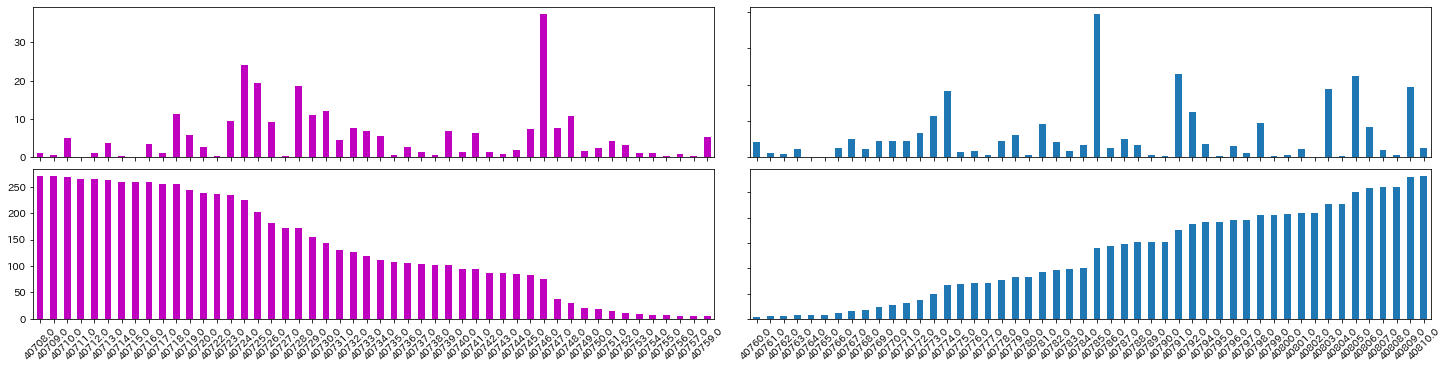

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20, 5), constrained_layout=True)

df_bid["size"][::-1].plot(kind="bar", ax=axes[0, 0], color="m", sharex=axes[1, 0])
df_bid["size"].cumsum()[::-1].plot(kind="bar", ax=axes[1, 0], color="m", rot=45)
axes[1, 0].set_xticklabels(df_bid["price"][::-1])


df_ask["size"].plot(kind="bar", ax=axes[0, 1], sharex=axes[1, 1], sharey=[0, 0])
df_ask["size"].cumsum().plot(kind="bar", ax=axes[1, 1], rot=45)
axes[1, 1].set_xticklabels(df_ask["price"]);

## テーマ変更

matplotlibのstyleを変える - Qiita
https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba

[Style sheets reference — Matplotlib 3.5.1 documentation](https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html)




In [30]:
plt.style.use("bmh")

## 参考書
- [Chart Visualization — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/user_guide/visualization.html)
- [改訂版 Pythonユーザのための Jupyter［実践］入門：書籍案内｜技術評論社](https://gihyo.jp/book/2020/978-4-297-11568-5) 2020年8月24日販売
